# Mid-term Project (Logistic Regression)¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values=' ')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [4]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

changing “No internet service” to “No” for six columns, they are: “OnlineSecurity”, “OnlineBackup”, “DeviceProtection”, “TechSupport”, “streamingTV”, “streamingMovies”

In [5]:
#run
def impute(x):
    if x=='No internet service':
        return 'No'
    else:
        return x

In [6]:
columns=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in columns:
    data[col]=data[col].apply(impute)

changing “No phone service” to “No” for column “MultipleLines”

In [7]:
data['MultipleLines']=data.MultipleLines.apply(lambda x: 'No' if x=='No phone service' else x)

the minimum tenure is 1 month and maximum tenure is 72 months, we can group them into five tenure groups: “0–12 Month”, “12–24 Month”, “24–48 Months”, “48–60 Month”, “> 60 Month”

In [8]:
def group_tenure(tenure):
    if (tenure >= 0 and tenure <= 12):
        return '0-12 Month'
    elif (tenure > 12 and tenure <= 24):
        return '12-24 Month'
    elif(tenure > 24 and tenure <= 48):
        return '24-48 Month'
    elif(tenure > 48 and tenure <=60):
        return '48-60 Month'
    elif(tenure > 60):
        return '> 60 Month'

In [9]:
data['tenure_group'] = data['tenure'].apply(group_tenure)

In [10]:
#Change the values in column “SeniorCitizen” from 0 or 1 to “No” or “Yes”.
data['SeniorCitizen']=data['SeniorCitizen'].apply(lambda x: 'No' if x==0 else 'Yes')

In [11]:
#the customerID and tenure columns as they are not required for the analysis.
data.drop(['customerID','tenure'],axis=1,inplace=True)

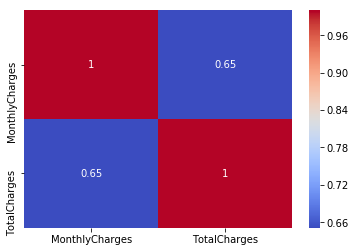

In [12]:
#checking correlation between numerical variable
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [13]:
# Mothly charges and Total Charges are correlated. so removing TotalCharges column from data set
data.drop('TotalCharges', inplace=True,axis=1)

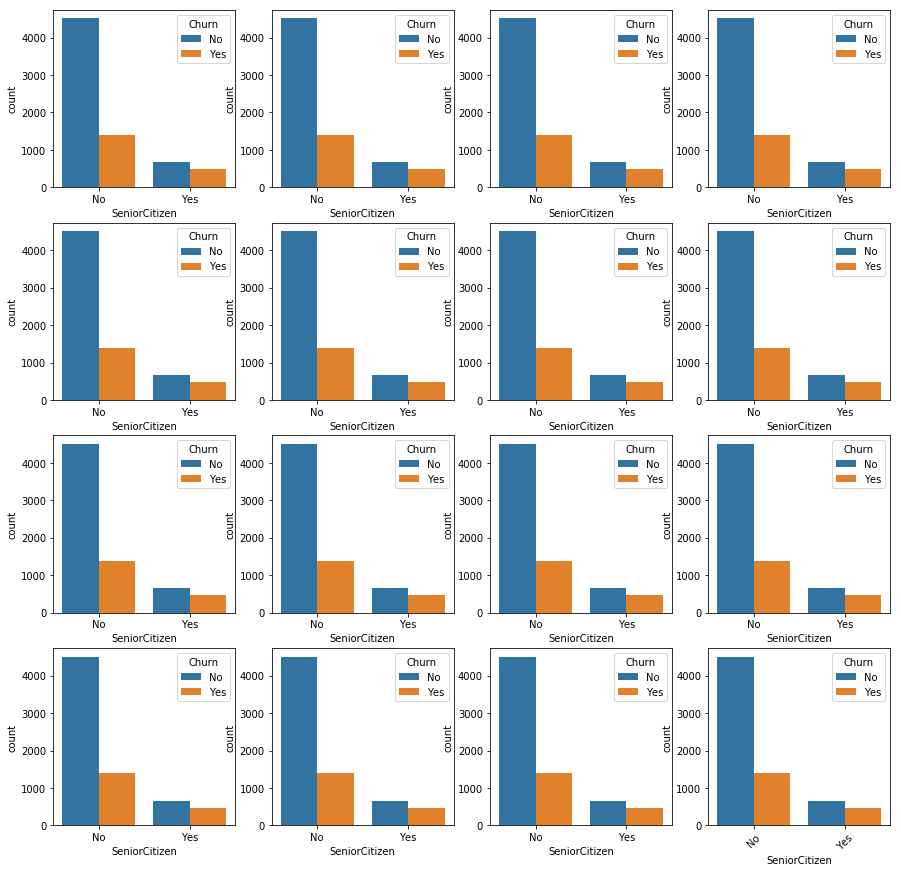

In [14]:
# Bar plots of categorical variables
fig,ax=plt.subplots(4,4,figsize=(15,15))
for i in range(0,16):
    g=sns.countplot(x=data.iloc[:,1],hue=data['Churn'], ax=ax[divmod(i,4)])
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)  

All of the categorical variables seem to have a reasonably broad distribution, therefore, all of them will be kept for the further analysis.

In [15]:
#creating dummy variable
dummy_var=pd.get_dummies(data.drop(['Churn','MonthlyCharges'],axis=1),drop_first=True)

In [16]:
#dropping the columns for which dummy variables are created.
data.drop(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
       'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','tenure_group'],
        axis=1,inplace=True )

#Dummy Variables are added to dataset and renamed it as train.
train=pd.concat([data,dummy_var],axis=1)

In [17]:
train.head()

,MonthlyCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_12-24 Month,tenure_group_24-48 Month,tenure_group_48-60 Month,tenure_group_> 60 Month
0,29.85,No,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,56.95,No,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,53.85,Yes,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,42.30,No,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,70.70,Yes,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [18]:
#Split the data into training set and testing set using train_test_split
from sklearn.model_selection import train_test_split

X=train.drop('Churn',axis=1)
y=train['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
#Train and fit a logistic regression model on the training set.
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
#predicting values for the testing data.
predictions = logmodel.predict(X_test)

In [22]:
#classification report for the model.
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         No       0.83      0.91      0.87      1697
        Yes       0.67      0.51      0.58       628

avg / total       0.79      0.80      0.79      2325



In [23]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[1538,  159],
       [ 306,  322]], dtype=int64)